In [7]:
import folium
import gpxpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
gpx_file = open('gpx/ski_day_1.gpx', 'r')
gpx = gpxpy.parse(gpx_file)

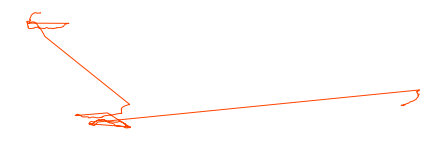

In [9]:
fig = plt.figure()#facecolor = '0.8')
ax = plt.Axes(fig, [0., 0., 1., 1.], )
ax.set_aspect('equal')
ax.set_axis_off()
fig.add_axes(ax)
plt.plot(lon, lat, color = 'orangered', lw = 1)

(4230.1182456, 8692.4543464)

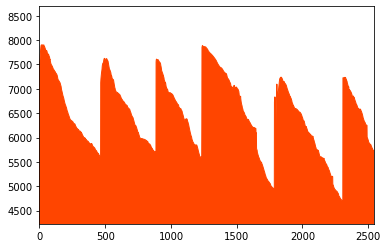

In [10]:
plt.fill_between(x = np.arange(0,len(elev)), y1 = elev, color = 'orangered')
plt.xlim([0,len(elev)])
plt.ylim([min(elev)*.9,max(elev)*1.1])

In [12]:
lat = []
lon = []
elev = []
points = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            lat.append(point.latitude)
            lon.append(point.longitude)
            elev.append(point.elevation)
            points.append(tuple([point.latitude, point.longitude]))

In [14]:
latitude = np.mean(lat)
longitude = np.mean(lon)
ski_map = folium.Map(location=[latitude, longitude], zoom_start=11)
#add a markers
# for each in points:
#     folium.Marker(each).add_to(ski_map)
    
# fadd lines
folium.PolyLine(points, color="orangered", weight=2.5, opacity=1).add_to(ski_map)
ski_map

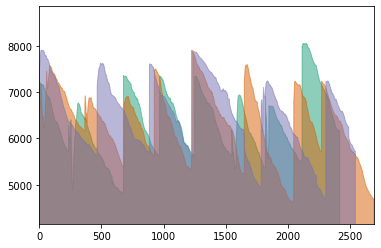

In [4]:
ski_map = folium.Map()
colors = ['#1b9e77',
'#d95f02',
'#7570b3']
fig = plt.figure()#facecolor = '0.8')

x_max = 0
x_min = 0
y_min = 50000
y_max = 0

for i in range(1,4):
    gpx_file = open(f'gpx/ski_day_{i}.gpx', 'r')
    gpx = gpxpy.parse(gpx_file)
    lat = []
    lon = []
    elev = []
    points = []

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                lat.append(point.latitude)
                lon.append(point.longitude)
                elev.append(point.elevation * 3.28084)  # meters to feet
                points.append(tuple([point.latitude, point.longitude]))
    
    folium.PolyLine(points, color=colors[i-1], weight=2.5, opacity=1).add_to(ski_map)
    plt.fill_between(x = np.arange(0,len(elev)), y1 = elev, color = colors[i-1], alpha = .5)
    
    if np.min(elev) < y_min:
        y_min = np.min(elev)
    if np.max(elev) > y_max:
        y_max = np.max(elev)
    if len(elev) > x_max:
        x_max = len(elev)
plt.xlim([x_min, x_max])
plt.ylim([y_min*.9, y_max*1.1])

ski_map    

In [37]:
ski_map.save("heli_skiing_map.html")

In [92]:
folium.TileLayer('stamentoner').add_to(ski_map)
folium.LayerControl().add_to(ski_map)

In [93]:
ski_map

In [12]:
from scipy.signal import argrelextrema
x = arr = np.array(elev)
argrelextrema(x, np.greater)


(array([  14,   51,   81,  294,  296,  316,  379,  393,  413,  435,  494,
         510,  518,  549,  588,  591,  710,  732,  751,  781,  787,  819,
         830,  835,  846,  856,  864,  866,  877,  891,  903,  958,  967,
         974,  984,  987,  997, 1111, 1113, 1119, 1188, 1194, 1196, 1226,
        1239, 1410, 1413, 1417, 1433, 1497, 1509, 1567, 1570, 1582, 1616,
        1622, 1625, 1635, 1637, 1644, 1688, 1730, 1778, 1782, 1790, 1805,
        1811, 1836, 1838, 1906, 1931, 1947, 1949, 1977, 1979, 2012, 2027,
        2029, 2042, 2045, 2050, 2059, 2076, 2079, 2110, 2116, 2119, 2149,
        2313, 2321, 2323, 2352, 2358, 2393, 2414, 2427, 2440, 2442, 2493]),)

In [68]:
np.greater?

In [58]:
peaks = np.gradient(x)
peaks_idx = [x for x in peaks if x>200]

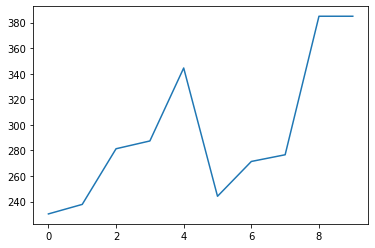

In [59]:
plt.plot(peaks_idx)

In [63]:
peak_idx = [] 
for idx in range(0, len(peaks)) : 
    if peaks[idx] > 200: 
        peak_idx.append(idx) 

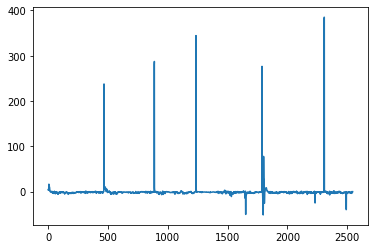

In [66]:
plt.plot(peaks)

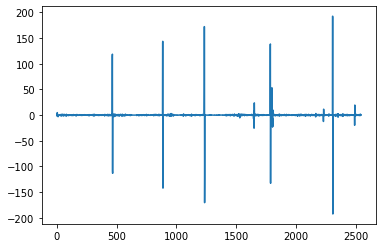

In [72]:
plt.plot(np.gradient(peaks))

In [73]:
peak_idx = [] 
for idx in range(0, len(np.gradient(peaks))) : 
    if np.gradient(peaks)[idx] > 100: 
        peak_idx.append(idx) 

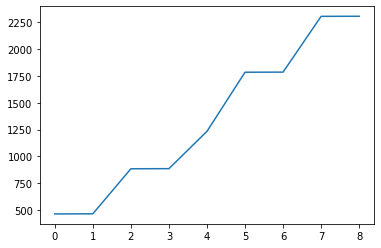

In [74]:
plt.plot(peak_idx)